In [2]:
%load_ext autoreload
%autoreload 2

# standard stuff
import os
import pandas as pd
import numpy as np
np.random.seed(123)
import json
import pickle 
from time import time
from tqdm import tqdm
import datetime as dt
from collections import Counter

# text processing
import re
with open('stopwords-de_no-parties.json', 'r') as file:
    stopwords_de = json.load(file)
from  nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("german")
import spacy
nlp = spacy.load('de')

# visualization 
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set()
import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected=True)

# Gensim LDA
from gensim import corpora
from gensim.models import LdaModel, CoherenceModel
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

# custom imports
from data_handling import load_data, collapse_dfs
from text_preprocessing import df_processing

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
read_in = True
path = '/home/franzi/Git-DSR/Twitter_sentimentanalysis/Data/lda_nonlp_stemmed_data.pickle'
parties = ['AfD', 'SPD', 'CDU', 'CSU', 'FDP', 'LINKE', 'Gruene', 'Grüne']
dates = ['08-{:02d}'.format(i) for i in range(2, 4)]


if read_in:
    parties = parties
    dates = dates
    aug_data = {}
    print('Loading: {}'.format(dates))
    for party in parties:
        load_list = ['../Data/{}/{}_2018-{}.json'.format(party, party, day) for day in dates]
        aug_data[party] = load_data(load_list)
        print('{} loaded'.format(party))
    with open(path, 'wb') as fid:
        pickle.dump(aug_data, fid)
    print("Done")
else:
    print('loading data from pickle')
    with open(path, 'rb') as fid:
        aug_data = pickle.load(fid)
        print('data loaded')

  0%|          | 0/2 [00:00<?, ?it/s]

Loading: ['08-02', '08-03']


/home/franzi/Git-DSR/Twitter_sentimentanalysis/Scripts/data_handling.py:34: FutureWarning:

'created_at' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

 50%|█████     | 1/2 [00:19<00:19, 19.47s/it]/home/franzi/Git-DSR/Twitter_sentimentanalysis/Scripts/data_handling.py:34: FutureWarning:

'created_at' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

  0%|          | 0/2 [00:00<?, ?it/s]

AfD loaded


/home/franzi/Git-DSR/Twitter_sentimentanalysis/Scripts/data_handling.py:34: FutureWarning:

'created_at' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

 50%|█████     | 1/2 [00:06<00:06,  6.30s/it]/home/franzi/Git-DSR/Twitter_sentimentanalysis/Scripts/data_handling.py:34: FutureWarning:

'created_at' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

  0%|          | 0/2 [00:00<?, ?it/s]

SPD loaded


/home/franzi/Git-DSR/Twitter_sentimentanalysis/Scripts/data_handling.py:34: FutureWarning:

'created_at' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

 50%|█████     | 1/2 [00:02<00:02,  2.64s/it]/home/franzi/Git-DSR/Twitter_sentimentanalysis/Scripts/data_handling.py:34: FutureWarning:

'created_at' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

  0%|          | 0/2 [00:00<?, ?it/s]

CDU loaded


/home/franzi/Git-DSR/Twitter_sentimentanalysis/Scripts/data_handling.py:34: FutureWarning:

'created_at' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

 50%|█████     | 1/2 [00:04<00:04,  4.20s/it]/home/franzi/Git-DSR/Twitter_sentimentanalysis/Scripts/data_handling.py:34: FutureWarning:

'created_at' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

  0%|          | 0/2 [00:00<?, ?it/s]

CSU loaded


/home/franzi/Git-DSR/Twitter_sentimentanalysis/Scripts/data_handling.py:34: FutureWarning:

'created_at' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

 50%|█████     | 1/2 [00:24<00:24, 24.51s/it]/home/franzi/Git-DSR/Twitter_sentimentanalysis/Scripts/data_handling.py:34: FutureWarning:

'created_at' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

  0%|          | 0/2 [00:00<?, ?it/s]

FDP loaded


/home/franzi/Git-DSR/Twitter_sentimentanalysis/Scripts/data_handling.py:34: FutureWarning:

'created_at' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

 50%|█████     | 1/2 [00:04<00:04,  4.52s/it]/home/franzi/Git-DSR/Twitter_sentimentanalysis/Scripts/data_handling.py:34: FutureWarning:

'created_at' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

  0%|          | 0/2 [00:00<?, ?it/s]

LINKE loaded


/home/franzi/Git-DSR/Twitter_sentimentanalysis/Scripts/data_handling.py:34: FutureWarning:

'created_at' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

 50%|█████     | 1/2 [00:01<00:01,  1.67s/it]/home/franzi/Git-DSR/Twitter_sentimentanalysis/Scripts/data_handling.py:34: FutureWarning:

'created_at' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

  0%|          | 0/2 [00:00<?, ?it/s]

Gruene loaded


/home/franzi/Git-DSR/Twitter_sentimentanalysis/Scripts/data_handling.py:34: FutureWarning:

'created_at' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

 50%|█████     | 1/2 [00:02<00:02,  2.03s/it]/home/franzi/Git-DSR/Twitter_sentimentanalysis/Scripts/data_handling.py:34: FutureWarning:

'created_at' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

100%|██████████| 2/2 [00:05<00:00,  2.85s/it]


Grüne loaded
Done


In [4]:
collapse = True
path_collapse = '/home/franzi/Git-DSR/Twitter_sentimentanalysis/Data/all_data_lda_nonlp_stemmed.pickle' # path where pickle file is saved

if collapse:
    all_data = collapse_dfs(aug_data)
    df_processing(all_data)
    all_data = all_data.drop_duplicates('clean_text')
    all_data['user_id'] = all_data.loc[:, 'user'].map(lambda x: x['id_str'])
    all_data.drop('user', inplace=True, axis=1)
    print('dumping data to pickle')
    with open(path_collapse, 'wb') as fid:
        pickle.dump(all_data, fid)
    print('data dumped')
else: 
    print('loading data from pickle')
    with open(path_collapse, 'rb') as fid:
        all_data = pickle.load(fid)
        print('data loaded')

dumping data to pickle
data dumped


# LDA using gensim 

- take all words from clean text
    - make them lower-case
    - take only words longer than 2 characters
    - stem them
- prepare a common dictionary
- prepare common corpus with vectorized (bow) words
- run through a couple of topics numbers and look at metrics: coherence score and model perplexity
    -> chose number of topics where metrics look best
- run lda on corpus, evaluate model and visualize it

In [5]:
save = True

path_com_corpus = '../Data/lda_nonlp_stemmed_ccorpus.pkl'
path_corpus = '../Data/lda_nonlp_stemmed_corpus.pkl'
path_dic = '../Data/lda_nonlp_stemmed_dic.pkl'

if save:
    
    text = all_data.loc[:, 'clean_text']

    document = []
    corpus = []

    for row in text.iteritems():
        index, data = row
        document.append(data)
        
    for doc in document:
        sub_doc = []
        for word in doc.split():
            if ((word.lower() not in stopwords_de)
                and (len(word) > 2)):
                word = stemmer.stem(word)
                sub_doc.append(word)
        corpus.append(sub_doc)

    common_dictionary = corpora.Dictionary(corpus, prune_at=10000)
    common_corpus = [common_dictionary.doc2bow(t) for t in corpus]
    
    with open(path_com_corpus, 'wb') as fid:
        pickle.dump(common_corpus, fid)
    with open(path_dic, 'wb') as fid:
        pickle.dump(common_dictionary, fid)
    with open(path_corpus, 'wb') as fid:
        pickle.dump(corpus, fid)       
else:
    with open(path_com_corpus, 'rb') as fid:
        common_corpus = pickle.load(fid)
    with open(path_dic, 'rb') as fid:
        common_dictionary = pickle.load(fid)
    with open(path_corpus, 'rb') as fid:
        corpus = pickle.load(fid)

At 80 of 100
At 85 of 100
At 90 of 100


/home/franzi/miniconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1023: RuntimeWarning:

divide by zero encountered in log



At 95 of 100
Process took 2.8495809555053713 min


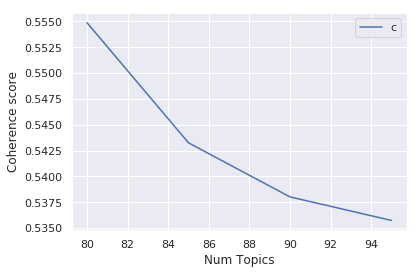

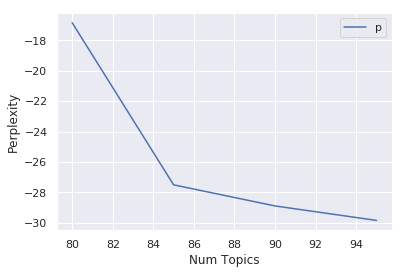

In [6]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute coherence for various number of topics

    Parameters:
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Plots coherence score over number of topics
    """
    tick = time()
    coherence_values = []
    model_list = []
    perplexity_values = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, 
                       id2word=dictionary, 
                       num_topics=num_topics, 
                       alpha=0.001, 
                       minimum_probability=0.2,
                       iterations=10)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        perplexity_values.append(model.log_perplexity(common_corpus))
        print('At {} of {}'.format(num_topics, limit))
    print('Process took {} min'.format((time()-tick)/60))
        
    x = range(start, limit, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

    plt.plot(x, perplexity_values)
    plt.xlabel("Num Topics")
    plt.ylabel("Perplexity")
    plt.legend(("perplexity"), loc='best')
    plt.show()

compute_coherence_values(common_dictionary, common_corpus, corpus, limit=100, start=80, step=5)

Subsequent visual evaluation of the model shows that model perplexity in this case is more reliable:
chose the point where curve starts to flatten (elbow) - this will give the best result

In [8]:
lda = LdaModel(common_corpus, 
               num_topics=84, 
               id2word=common_dictionary,
               passes=4,
               alpha=0.001, 
               random_state=123, 
               minimum_probability=0.4,
               per_word_topics=True,
               iterations=70)

# Compute Coherence Score using c_v
tic = time()
coherence_model_lda = CoherenceModel(model=lda, texts=corpus, dictionary=common_dictionary, coherence='c_v')
tac = time() - tic 
print('Calculating coherence model took{}'.format(tac/60))

coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score c_v: ', coherence_lda)

# Compute Coherence Score using u-mass
coherence_model_lda = CoherenceModel(model=lda, texts=corpus, dictionary=common_dictionary, coherence='u_mass')

coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score u-mass: ', coherence_lda)

perplexity = lda.log_perplexity(common_corpus)
print('Model perplexity: ', perplexity)
toc = time() - tic
print('{}'.format(toc/60))

ldavis_prepared = pyLDAvis.gensim.prepare(lda, common_corpus, common_dictionary)

pyLDAvis.display(ldavis_prepared)

Calculating coherence model took0.0009189009666442871
Coherence Score c_v:  0.5453166904539339
Coherence Score u-mass:  -15.919950317454699
Model perplexity:  -27.11766621832337
0.4491951068242391


/home/franzi/miniconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




https://nlp.stanford.edu/events/illvi2014/papers/sievert-illvi2014.pdf

- A topic in LDA is a multinomial distribution over the (typically thousands of) terms in the vocabulary of the corpus. 

In [9]:
def format_topics_sentences(ldamodel, corpus, texts):
    
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [10]:
save_topics = True
path = '../Data/lda_nonlp_stemmed_topics.pkl'

if save_topics:
    
    df_topic_sents_keywords = format_topics_sentences(ldamodel=lda, corpus=common_corpus, texts=corpus)
    # Format
    df_dominant_topic = df_topic_sents_keywords.reset_index()
    df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

    # reindex the initial dataframe, make list of initial df and topics df and concatenate both
    all_data_reindexed = all_data.reset_index(drop=True)
    df_list = [df_dominant_topic,all_data_reindexed]
    full_df = pd.concat(df_list, axis=1)
    # make the resulting dataframe datetime indexed again and throw away unwanted columns
    full_df.index = full_df['created_at']
    full_df = full_df.drop(['stemmed', 'tags', 'parties', 'full_text', 'created_at', 'mentions'], axis=1)
    # show
    full_df.head()

    with open(path, 'wb') as fid:
        pickle.dump(full_df, fid)

else:
    with open(path, 'rb') as fid:
        full_df = pickle.load(fid)

In [11]:
topic_counts = full_df.groupby(full_df.index.date)['Dominant_Topic'].value_counts().reset_index(name='counts')

In [12]:
topic_counts = topic_counts.set_index(pd.DatetimeIndex(topic_counts['level_0']))

In [27]:
topic_counts.index.unique()

DatetimeIndex(['2018-08-02', '2018-08-03', '2018-08-04', '2018-08-05',
               '2018-08-06', '2018-08-07', '2018-08-08', '2018-08-09',
               '2018-08-10', '2018-08-11', '2018-08-12', '2018-08-13',
               '2018-08-14', '2018-08-15', '2018-08-16', '2018-08-17',
               '2018-08-18', '2018-08-19', '2018-08-20', '2018-08-21',
               '2018-08-22', '2018-08-23', '2018-08-24', '2018-08-25',
               '2018-08-26', '2018-08-27', '2018-08-28', '2018-08-29',
               '2018-08-30', '2018-08-31'],
              dtype='datetime64[ns]', name='level_0', freq=None)

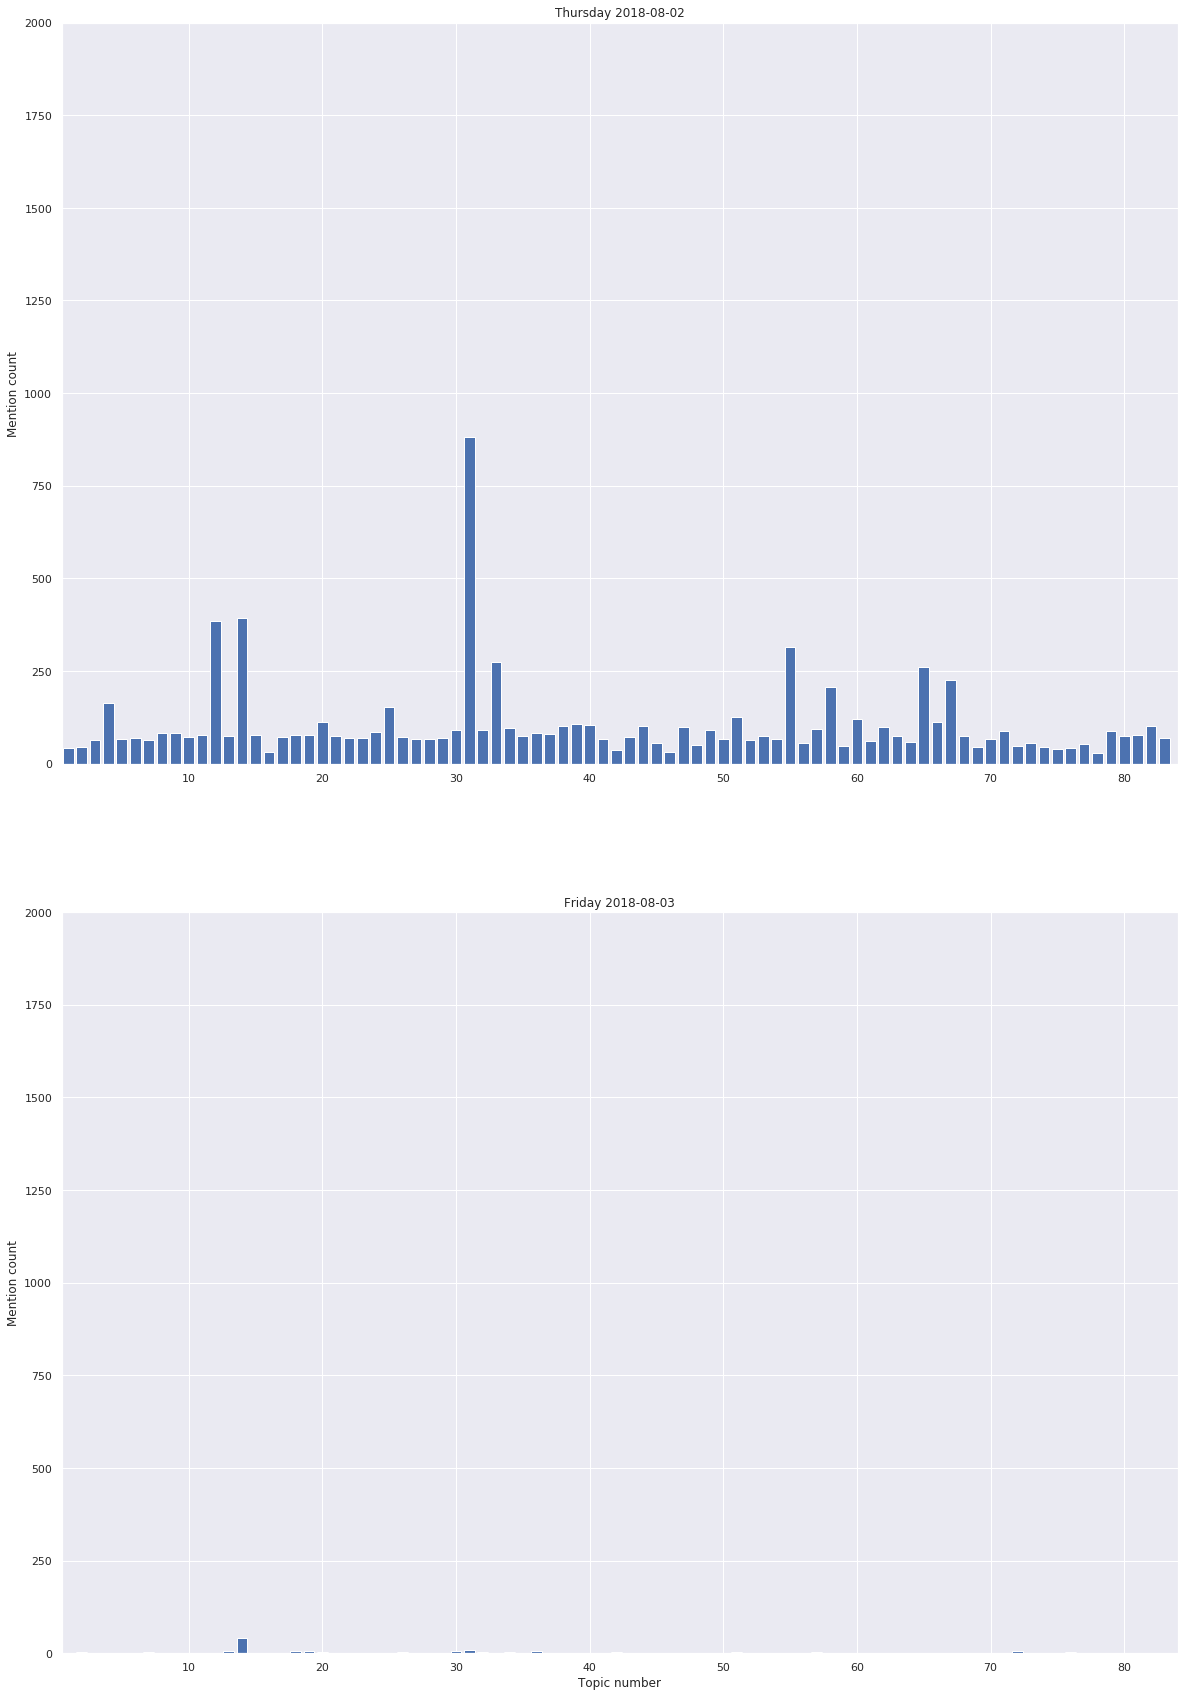

In [16]:
def topic_plot(df):
    dow = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    dates = df.index.unique()
    
    fig, ax = plt.subplots(len(dates), 1, figsize=(20, 30))

    for i, date in enumerate(dates):
        ax[i].bar(df.loc[date, 'Dominant_Topic'], df.loc[date, 'counts'], label=date) 
        ax[i].set_ylim(0, 2000)
        ax[i].set_title('{} {}'.format(dow[date.dayofweek], date.date()))
        ax[i].set_ylabel('Mention count')
        ax[i].set_xlim(0.5, len(df['Dominant_Topic'].unique()))
    plt.xlabel('Topic number')
    plt.show()

topic_plot(topic_counts)

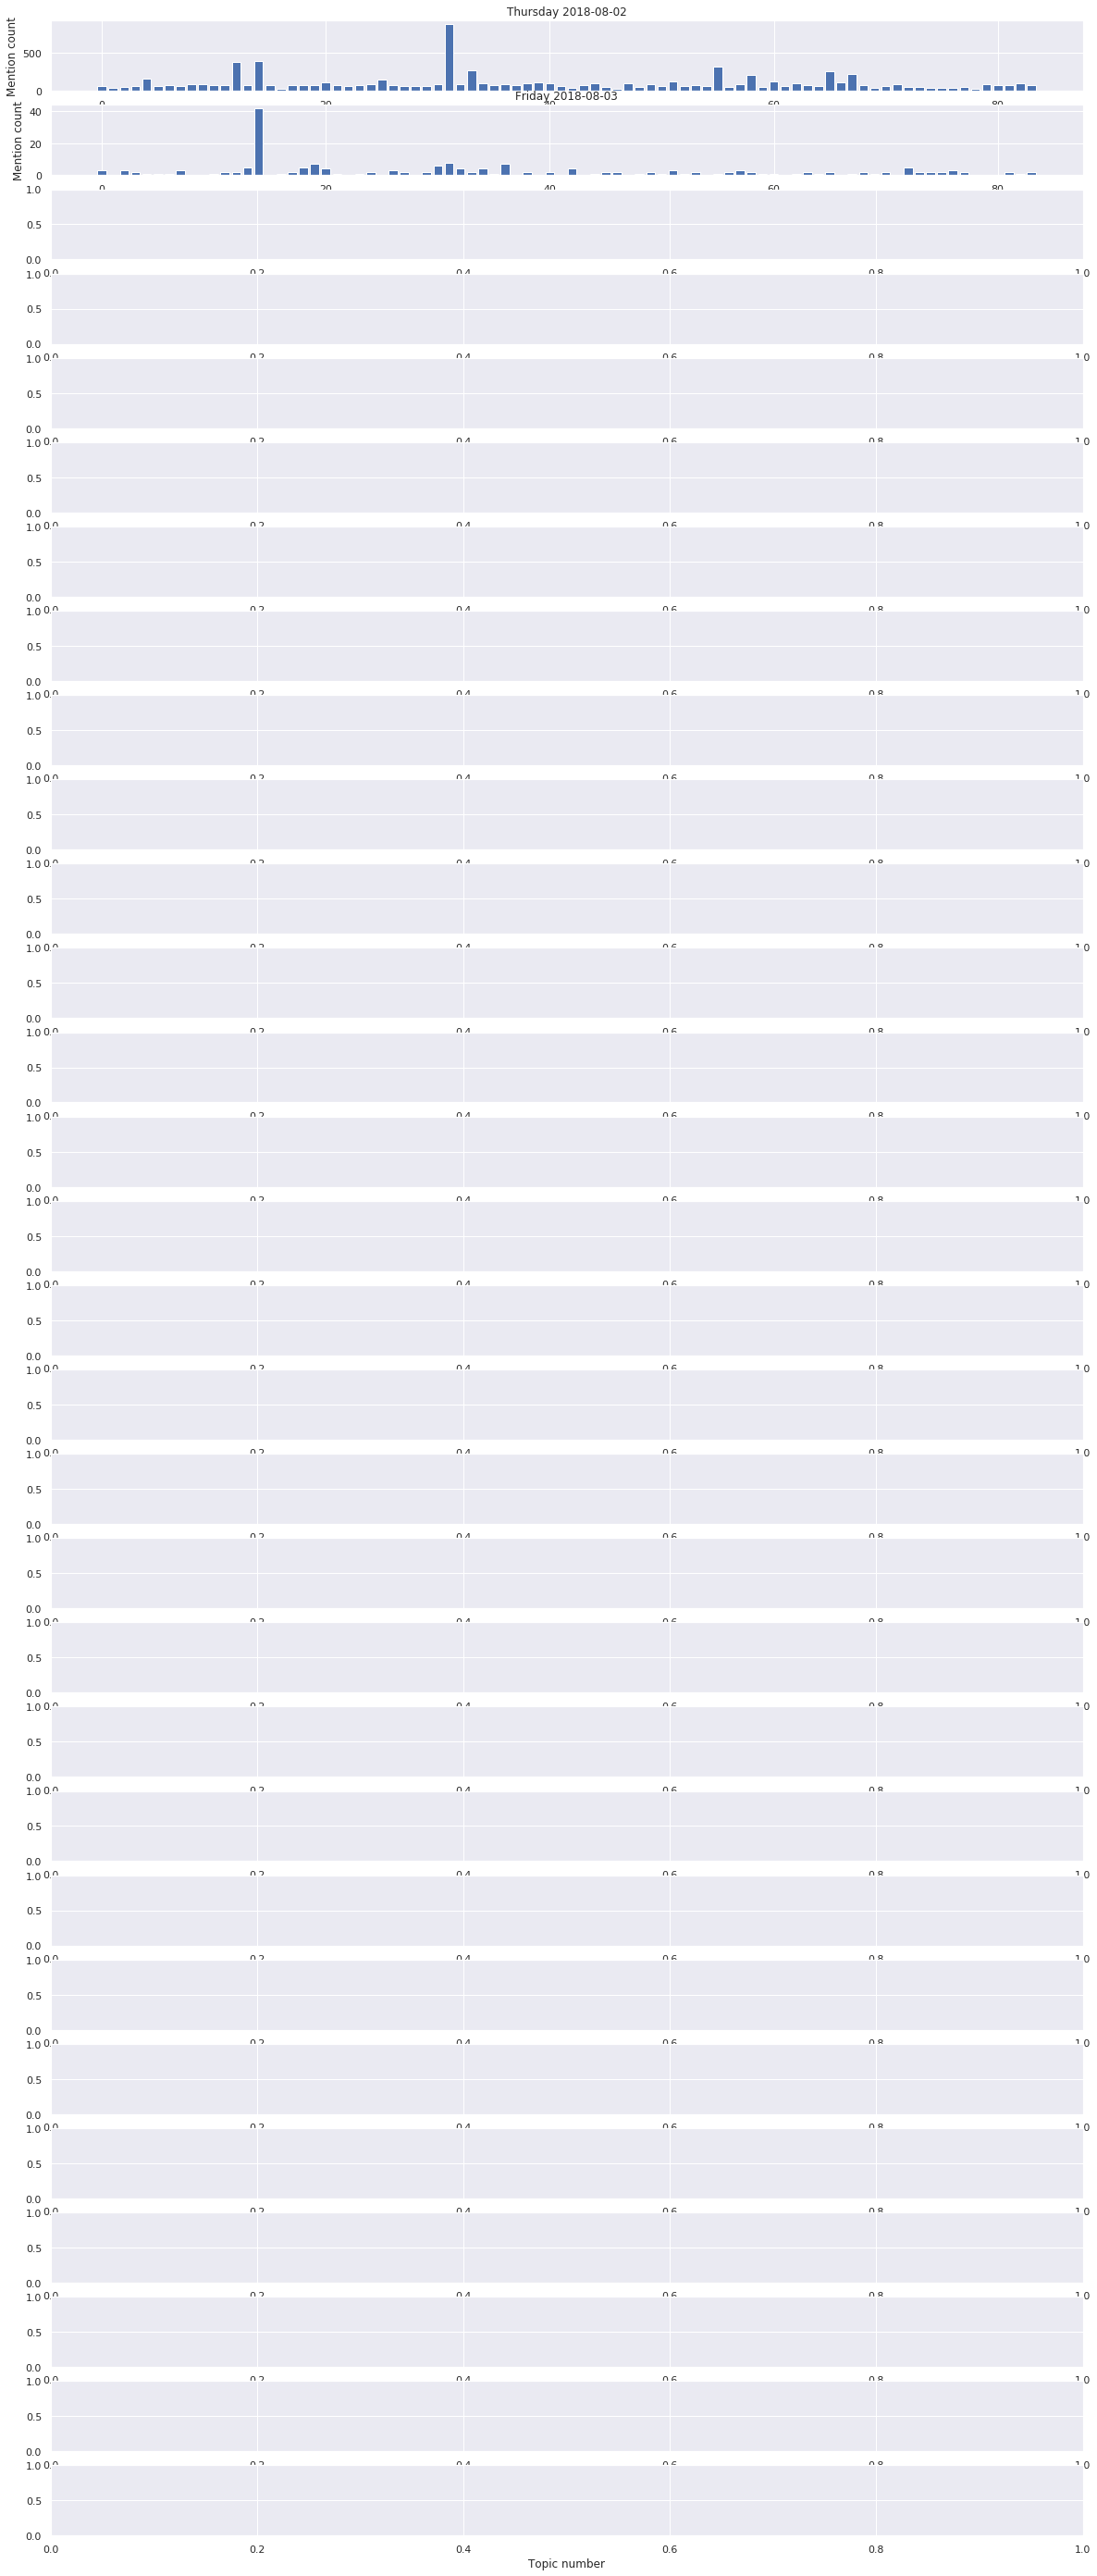

In [14]:
topic_plot(topic_counts, 30, 1)

In [ ]:
def print_largest_topics(topicsdf, fulldf, topic_prob=0.85, n_text=5):
    largest_tpcs = topicsdf.copy().reset_index().reset_index()
    frequent_topcs = largest_tpcs.groupby('level_0')['counts'].nlargest(5).reset_index().merge(
                 largest_tpcs[['index', 'topic']], left_on='level_1', right_on='index').drop(
                 columns='level_1')
    frequent_topcs_list = frequent_topcs.topic.unique()
    
    for topic in frequent_topcs_list:
        print(topic, fulldf[['Keywords']][fulldf['topic'] == topic].values[0])
        print(fulldf[['Topic_Perc_Contrib', 'clean_text']][(fulldf['topic'] == topic) & (fulldf['Topic_Perc_Contrib'] > topic_prob)].values[:n_text])

print_largest_topics(topic_counts, full_df, topic_prob=0.7, n_text=5)